In [87]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [94]:
data = pd.read_csv('data.csv')
data.head(10)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
5,5,GOA,2001,12,6,2,17,7,11,0
6,6,GUJARAT,2001,286,857,67,756,111,3667,0
7,7,HARYANA,2001,398,297,285,478,401,1513,0
8,8,HIMACHAL PRADESH,2001,124,105,10,310,14,317,0
9,9,JAMMU & KASHMIR,2001,169,504,13,622,288,50,0


In [69]:
data.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

In [97]:
data["Year"].value_counts()

Year
2011    36
2012    36
2020    36
2019    36
2018    36
2017    36
2016    36
2015    36
2014    36
2013    36
2021    36
2002    34
2010    34
2009    34
2008    34
2007    34
2006    34
2005    34
2004    34
2003    34
2001    34
Name: count, dtype: int64

In [71]:
data.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

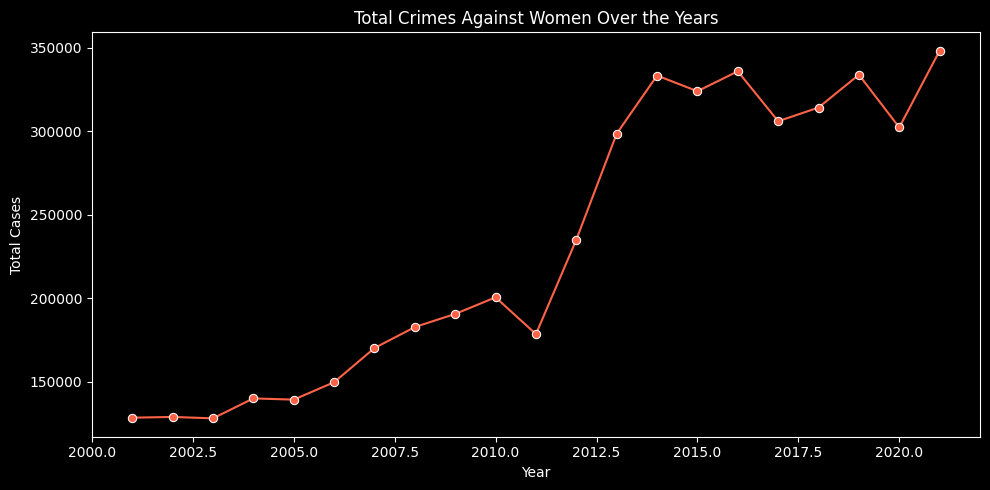

In [72]:
# 📊 Total cases per year (all types)
data['Total Crimes'] = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

total_by_year = data.groupby('Year')['Total Crimes'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=total_by_year.index, y=total_by_year.values, marker='o', color='tomato')
plt.title("Total Crimes Against Women Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


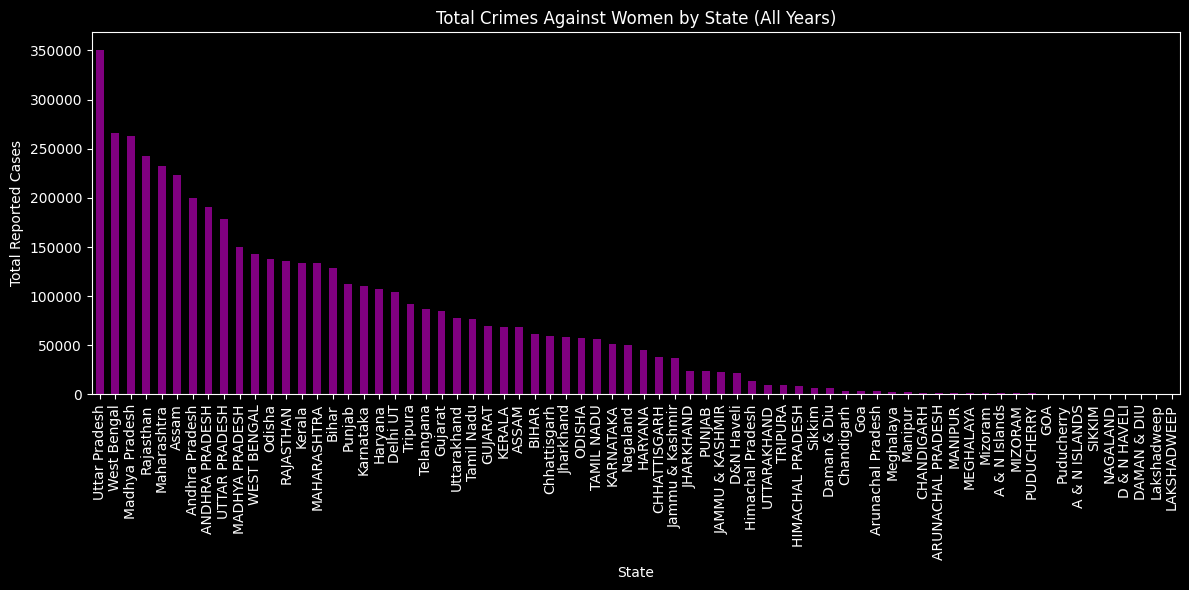

In [73]:
# 📍 Crimes by State (total of all years)
total_by_state = data.groupby('State')['Total Crimes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
total_by_state.plot(kind='bar', color='purple')
plt.title("Total Crimes Against Women by State (All Years)")
plt.xlabel("State")
plt.ylabel("Total Reported Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


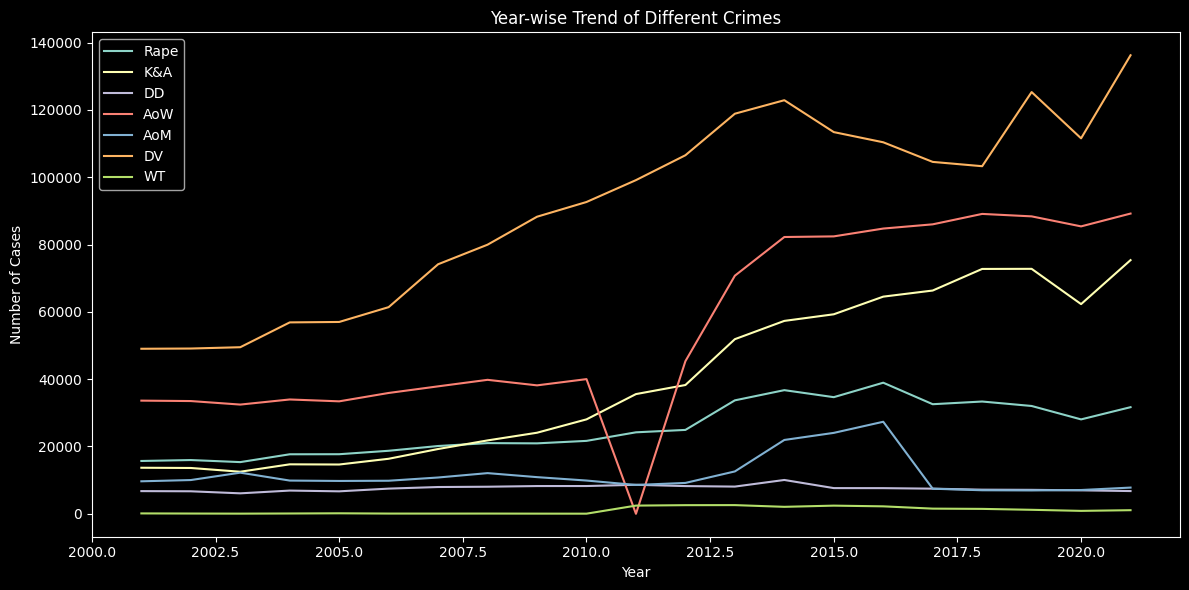

In [74]:
# 📈 Trend of individual crime types over years
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
plt.figure(figsize=(12,6))

for crime in crime_types:
    trend = data.groupby('Year')[crime].sum()
    sns.lineplot(x=trend.index, y=trend.values, label=crime)

plt.title("Year-wise Trend of Different Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
data.shape

(736, 11)

/tmp/ipykernel_19786/4163745006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Year', y='Rape', palette='Reds_r')


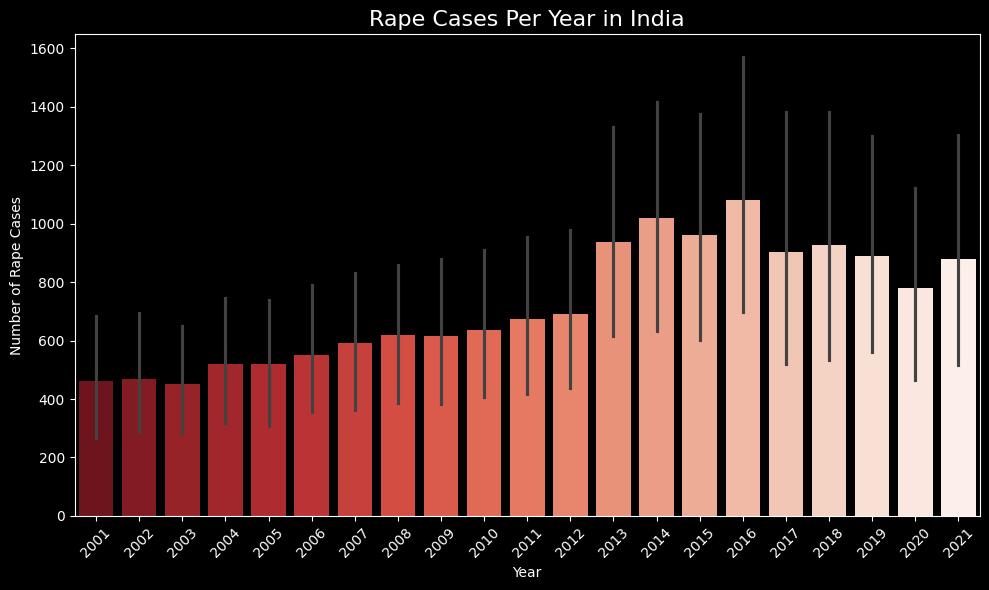

In [76]:
# Rape cases per year 
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Year', y='Rape', palette='Reds_r')
plt.title("Rape Cases Per Year in India", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Rape Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

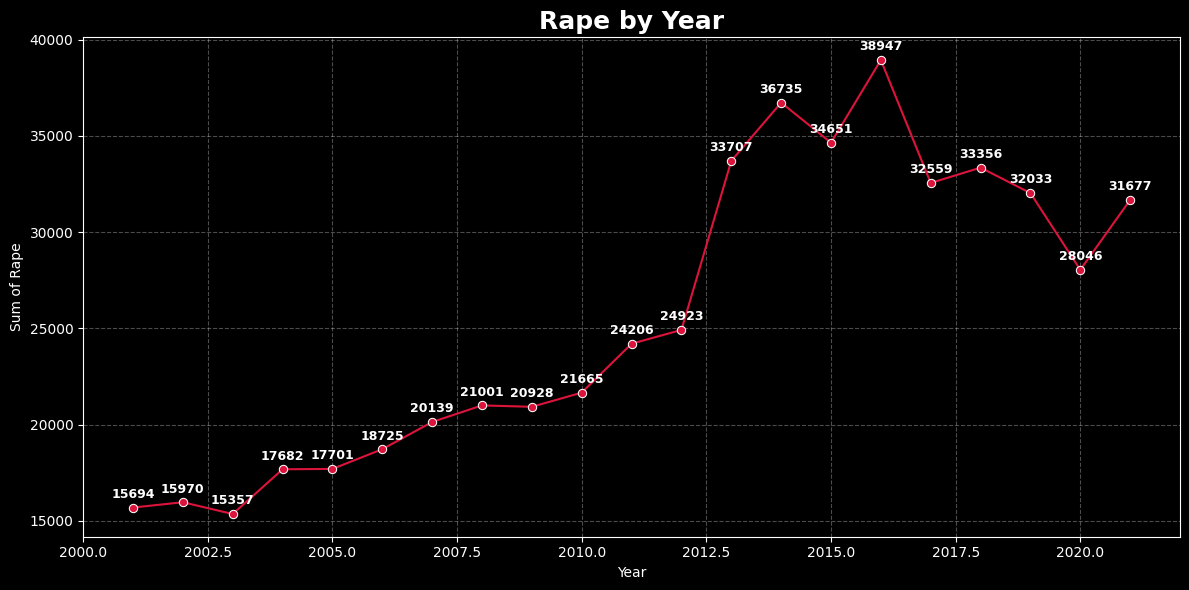

In [77]:
rape_by_year = data.groupby("Year")["Rape"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=rape_by_year, x="Year", y="Rape", marker='o', color='crimson')
for i in range(len(rape_by_year)):
    plt.text(rape_by_year["Year"][i], rape_by_year["Rape"][i]+500, str(rape_by_year["Rape"][i]), 
             ha='center', fontsize=9, color='white', weight='bold')
plt.title("Rape by Year", fontsize=18, weight='bold')
plt.xlabel("Year")
plt.ylabel("Sum of Rape")
plt.grid(visible=True, linestyle='--', alpha=0.3)
plt.style.use("dark_background")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19786/1426354311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rape_by_state, x="State", y="Rape", palette="coolwarm")


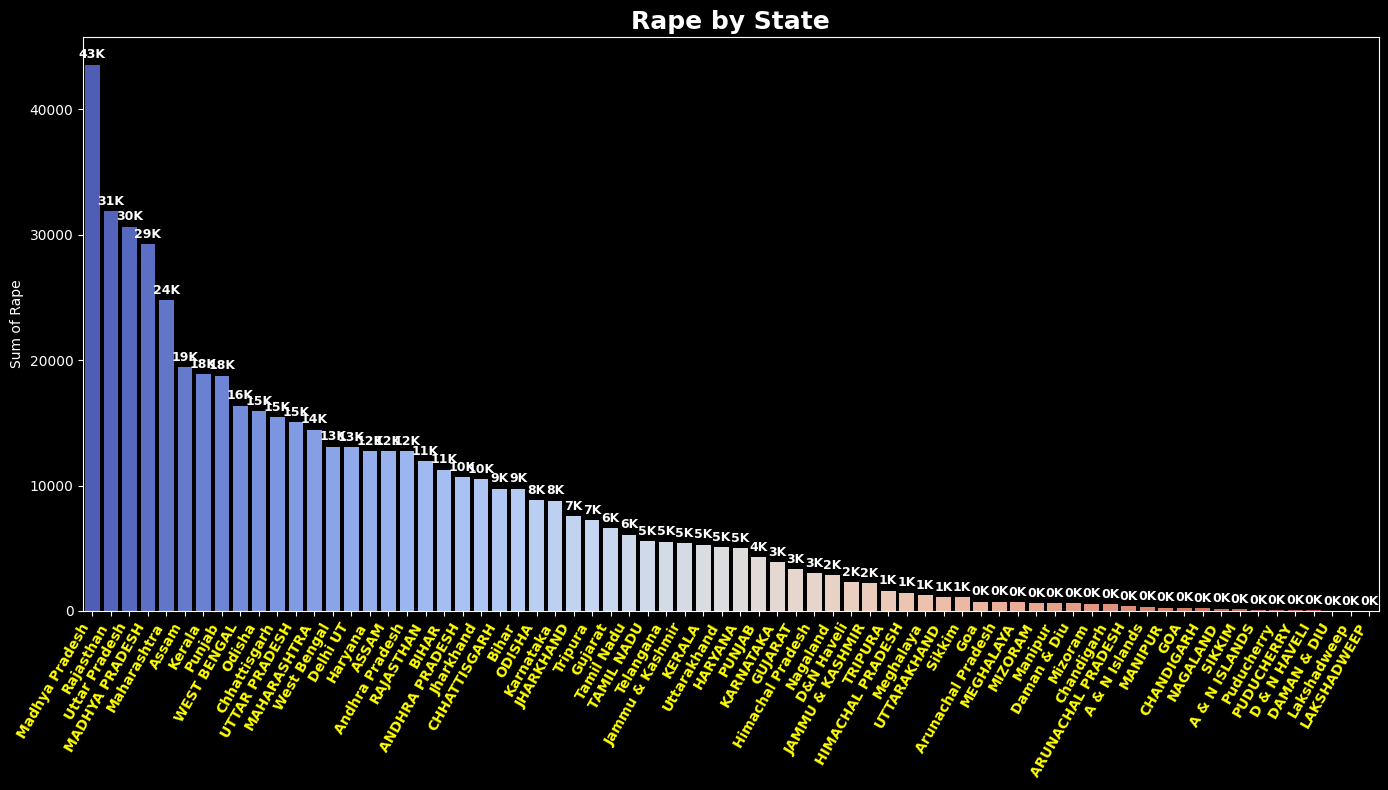

In [81]:
# Group by State
rape_by_state = data.groupby("State")["Rape"].sum().reset_index().sort_values(by="Rape", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=rape_by_state, x="State", y="Rape", palette="coolwarm")

# Add values on top
for i in range(len(rape_by_state)):
    plt.text(i, rape_by_state["Rape"].values[i]+500, 
             f"{rape_by_state['Rape'].values[i]//1000}K", 
             ha='center', fontsize=9, weight='bold', color='white')

plt.title("Rape by State", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Sum of Rape")
plt.xticks(rotation=60, ha='right', fontsize=10, weight='bold', color='yellow')
plt.yticks(color='white')
plt.style.use("dark_background")
plt.tight_layout()
plt.show()


In [83]:
print(data.columns)


Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT', 'Total Crimes'],
      dtype='object')


In [82]:
# Group by State
data['State'] = le.inverse_transform(data['State_encoded'])

rape_by_state = data.groupby("State")["WT"].sum().reset_index().sort_values(by="WT", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=rape_by_state, x="State", y="WT", palette="coolwarm")

# Add values on top
for i in range(len(rape_by_state)):
    plt.text(i, rape_by_state["WT"].values[i]+500, 
             f"{rape_by_state['WT'].values[i]//1000}K", 
             ha='center', fontsize=9, weight='bold', color='white')

plt.title("WT by State", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Sum of WT")
plt.xticks(rotation=60, ha='right', fontsize=10, weight='bold', color='yellow')
plt.yticks(color='white')
plt.style.use("dark_background")
plt.tight_layout()
plt.show()


KeyError: 'State_encoded'

/tmp/ipykernel_19786/285471061.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rape_by_state, x="State", y="K&A", palette="coolwarm")


ImproperlyConfigured: Requested setting BASE_DIR, but settings are not configured. You must either define the environment variable DJANGO_SETTINGS_MODULE or call settings.configure() before accessing settings.

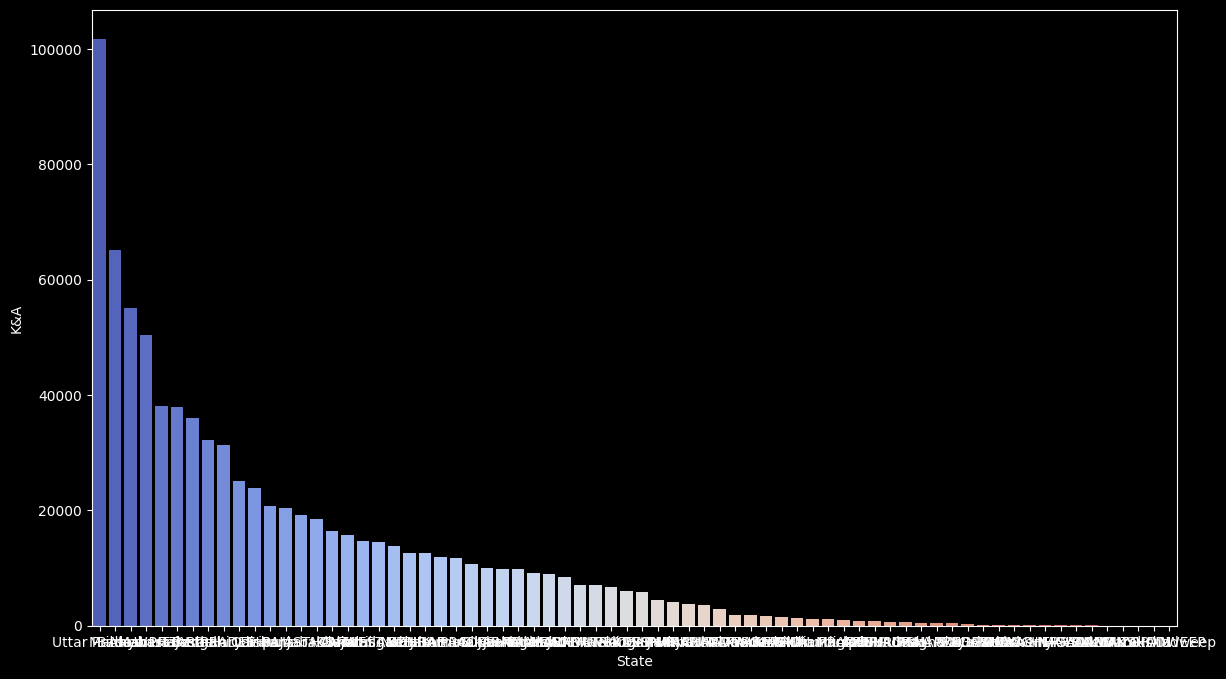

In [84]:
# Group by State
rape_by_state = data.groupby("State")["K&A"].sum().reset_index().sort_values(by="K&A", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=rape_by_state, x="State", y="K&A", palette="coolwarm")

# Add values on topfrom django.shortcuts import render
import pickle
import numpy as np
import os
from django.conf import settings
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Load model files from the project's base directory
BASE_DIR = settings.BASE_DIR
model_path = os.path.join(BASE_DIR, 'model.pkl')
scaler_path = os.path.join(BASE_DIR, 'scaler.pkl')
label_encoder_path = os.path.join(BASE_DIR, 'label_encoder.pkl')
csv_data_path = os.path.join(BASE_DIR,  'data.csv') 


with open(model_path, 'rb') as f:
    model = pickle.load(f)
with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)
with open(label_encoder_path, 'rb') as f:
    le = pickle.load(f)





# Dummy data (replace this with your actual data)
data = pd.read_csv(csv_data_path)
if 'State_encoded' not in data.columns:
    data['State_encoded'] = le.transform(data['State'])

# Define the function for crime prediction (as discussed above)
def predict_future_crimes_for_year(state_name, year, data, model, scaler, label_encoder):
    try:
        state_encoded = label_encoder.transform([state_name])[0]
    except:
        return f"Error: State '{state_name}' not found in the label encoder."

    # Historical data for the state
    state_data = data[data['State_encoded'] == state_encoded].copy()
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'DV']
    
    # Calculate trend (5-year rolling mean of differences)
    trends = {col: state_data[col].diff().rolling(5).mean().iloc[-1] for col in crime_cols}
    last_row = state_data.iloc[-1]
    
    # Initialize a dictionary to store the new data for the given year
    new_row = {'Unnamed: 0': last_row['Unnamed: 0'] + (year - last_row['Year']), 'Year': year}
    for col in crime_cols:
        last_value = last_row[col]
        new_row[col] = max(0, last_value + trends[col])
    new_row['State_encoded'] = state_encoded

    # Prepare the future data for prediction
    future_data = pd.DataFrame([new_row])

    # Select the features for scaling
    features = ['Unnamed: 0', 'Year'] + crime_cols + ['State_encoded']
    X_future = scaler.transform(future_data[features])

    # Predict total crimes
    total_predictions = model.predict(X_future)

    # Append the predicted total crimes to the future data
    future_data['Predicted Total Crimes'] = total_predictions[0]
    
    return future_data[['Year'] + crime_cols + ['Predicted Total Crimes']]

# Create your views here.
def home(request):
    prediction = None
    if request.method == 'POST':
        print("Form submitted!")  # Debug print
        print("POST data:", request.POST)  # Debug print

        state = request.POST.get('state')
        year = int(request.POST.get('year'))  # Convert to integer
        print("State:", state)  # Debug print
        print("Year:", year)  # Debug print

        try:
            # Ensure the state and year exist in the data
            if state not in data['State'].values:
                prediction = f"Error: State '{state}' not found in the dataset."
            elif int(year) not in data['Year'].values:
                prediction = f"Error: Year '{year}' not found in the dataset."
            else:
                
                future_data = predict_future_crimes_for_year(state, year, data, model, scaler, le)

                # Extract the predictions for the specified year
                prediction_data = future_data[['Year', 'Rape', 'K&A', 'DD', 'AoW', 'DV', 'Predicted Total Crimes']]

                # Convert prediction data to dictionary for rendering
                prediction = prediction_data.to_dict(orient='records')
                print(prediction)

        except Exception as e:
            prediction = f"Error: {e}"

    return render(request, 'home.html', {'prediction': prediction})

def about(request):
    return render(request, 'about.html')

def contact(request):
    return render(request, 'contact.html')

for i in range(len(rape_by_state)):
    plt.text(i, rape_by_state["K&A"].values[i]+500, 
             f"{rape_by_state['K&A'].values[i]//1000}K", 
             ha='center', fontsize=9, weight='bold', color='white')

plt.title("K&A by State", fontsize=18, weight='bold')
plt.xlabel("")
plt.ylabel("Sum of K&A")
plt.xticks(rotation=60, ha='right', fontsize=10, weight='bold', color='yellow')
plt.yticks(color='white')
plt.style.use("dark_background")
plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_lay'

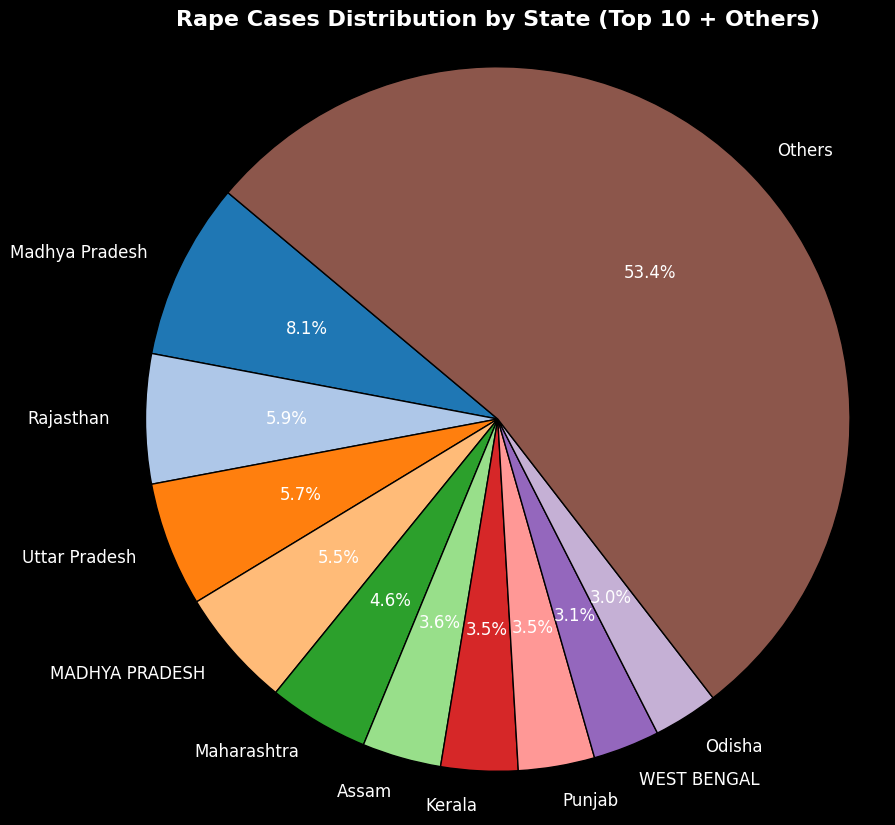

In [ ]:
rape_by_state = data.groupby("State")["Rape"].sum().sort_values(ascending=False)

# Optional: Limit to top 10 states for readability
top_states = rape_by_state[:10]
others = rape_by_state[10:].sum()
top_states["Others"] = others

# Plot pie chart
plt.figure(figsize=(10, 10))
colors = plt.cm.tab20.colors  # You can customize this with any colormap

plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140, colors=colors,
        textprops={'fontsize': 12, 'color': 'white'}, wedgeprops={'edgecolor': 'black'})

plt.title("Rape Cases Distribution by State (Top 10 + Others)", fontsize=16, weight='bold', color='white')
plt.style.use("dark_background")
plt.axis('equal')  # Makes it a perfect circle
plt.tight_lay

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    736 non-null    int64 
 1   State         736 non-null    object
 2   Year          736 non-null    int64 
 3   Rape          736 non-null    int64 
 4   K&A           736 non-null    int64 
 5   DD            736 non-null    int64 
 6   AoW           736 non-null    int64 
 7   AoM           736 non-null    int64 
 8   DV            736 non-null    int64 
 9   WT            736 non-null    int64 
 10  Total Crimes  736 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.4+ KB


In [ ]:
# Encode 'State' using LabelEncoder
le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])

# Drop original 'State' if needed
data.drop(columns=['State'], inplace=True)

# Define features and target
X = data.drop(columns=['Total Crimes'])
y = data['Total Crimes']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.6, random_state=42
)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


NameError: name 'X_scaled' is not defined

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 820.79
RMSE: 2031.09
R² Score: 0.95


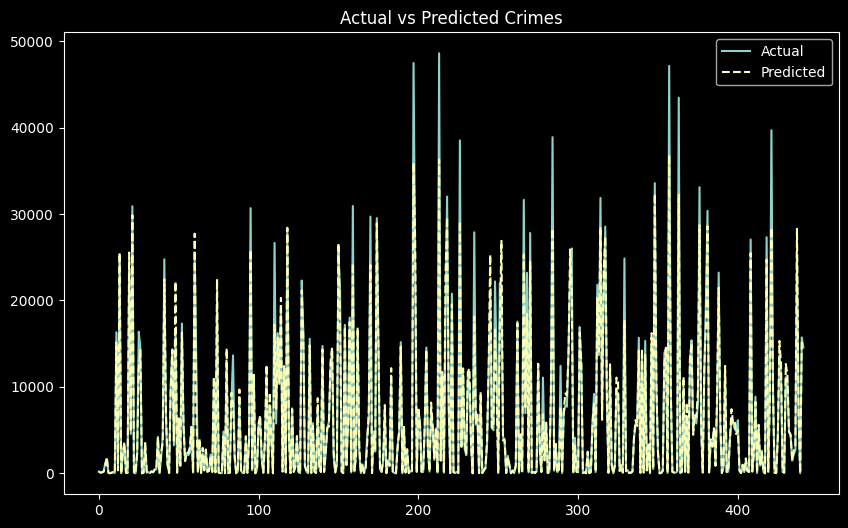

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Crimes')
plt.show()


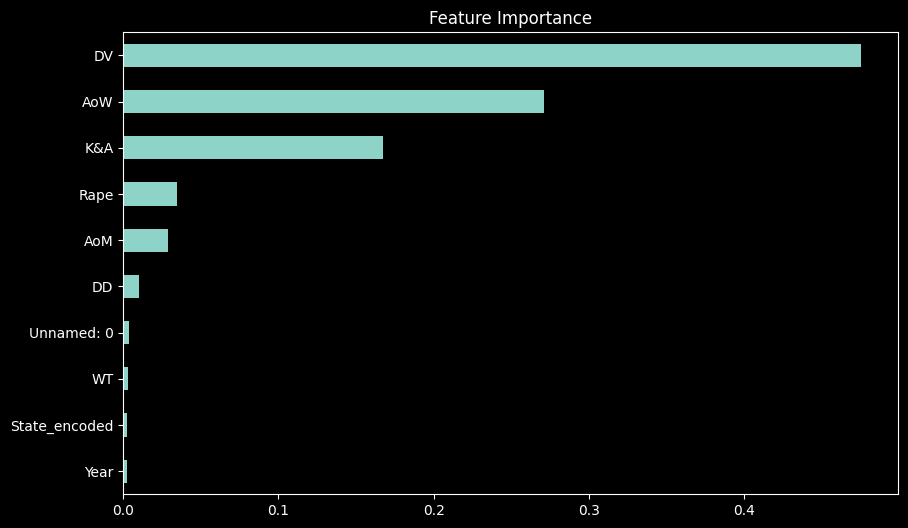

In [ ]:
feature_names = data.drop(columns=['Total Crimes']).columns
importances = model.feature_importances_

feat_imp = pd.Series(importances, index=feature_names)
feat_imp.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.show()


In [ ]:
data.columns
# data.head(5)

Index(['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT',
       'Total Crimes', 'State_encoded'],
      dtype='object')

In [ ]:
def predict_crimes_by_state(state_name, data, model, scaler, label_encoder):
    """
    Predict total crimes for a given state across all years in the dataset.
    """
    try:
        state_encoded = label_encoder.transform([state_name])[0]
    except ValueError:
        print(f"State '{state_name}' not found in label encoder.")
        return None

    state_data = data[data['State_encoded'] == state_encoded].copy()

    if state_data.empty:
        print("No data found for the specified state.")
        return None

    # MATCH training features exactly
    features = ['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT', 'State_encoded']
    X = state_data[features]

    # Predict
    X_scaled = scaler.transform(X)
    predictions = model.predict(X_scaled)

    return pd.DataFrame({
        'Year': state_data['Year'].values,
        'Actual Total Crimes': state_data['Total Crimes'].values,
        'Predicted Total Crimes': predictions.astype(int)
    })



   Year  Actual Total Crimes  Predicted Total Crimes
0  2001                 4048                    4318
1  2002                 5001                    5179
2  2003                 5198                    5288
3  2004                 5636                    5839
4  2005                 5920                    5969
5  2006                 6741                    6780
6  2007                 6807                    6810
7  2008                 8082                    8354
8  2009                 9644                   11074
9  2010                11493                   11505
   Year  Actual Total Crimes  Predicted Total Crimes
0  2001                 4048                    4318
1  2002                 5001                    5179
2  2003                 5198                    5288
3  2004                 5636                    5839
4  2005                 5920                    5969
5  2006                 6741                    6780
6  2007                 6807                  

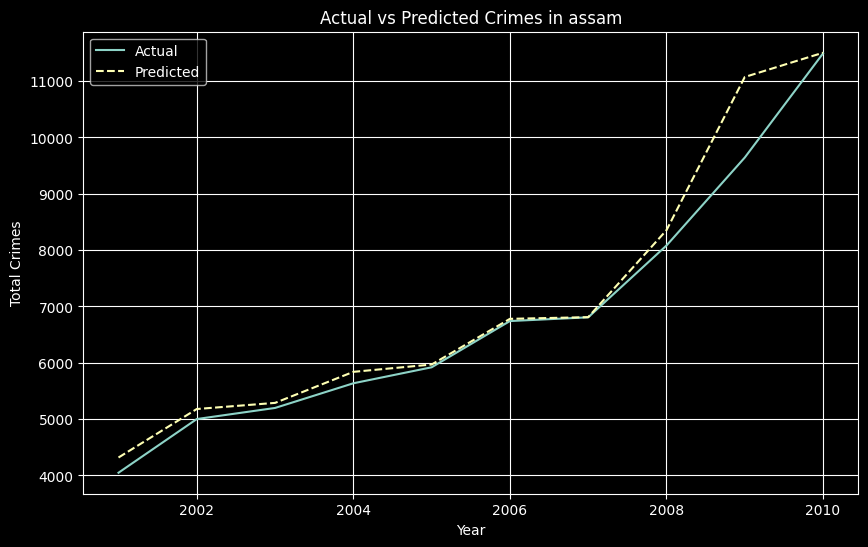

In [ ]:
# Assuming data is your original dataset
result = predict_crimes_by_state("ASSAM", data, model, scaler, le)
print(result)

# Display prediction
print(result)


plt.figure(figsize=(10,6))
plt.plot(result['Year'], result['Actual Total Crimes'], label='Actual')
plt.plot(result['Year'], result['Predicted Total Crimes'], label='Predicted', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title("Actual vs Predicted Crimes in assam")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Make sure your dataset includes all the features used during training
features = ['Unnamed: 0', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT', 'State_encoded']
X = data[features]
y_true = data['Total Crimes']

# Scale features
X_scaled = scaler.transform(X)

# Predict
y_pred = model.predict(X_scaled)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("🔢 Total Predictions:", len(y_pred))
print("✅ Mean Absolute Error (MAE):", round(mae, 2))
print("✅ Mean Squared Error (MSE):", round(mse, 2))
print("✅ R² Score:", round(r2, 4))


🔢 Total Predictions: 736
✅ Mean Absolute Error (MAE): 593.55
✅ Mean Squared Error (MSE): 2642592.38
✅ R² Score: 0.9677


In [103]:
import numpy as np
import pandas as pd

def predict_future_crimes(state_name, data, model, scaler, label_encoder, start_year=2025, end_year=2030):
    # Encode the state
    try:
        state_encoded = label_encoder.transform([state_name])[0]
    except ValueError:
        print(f"State '{state_name}' not found in encoder.")
        return None

    # Filter data for the state
    state_data = data[data['State_encoded'] == state_encoded].copy()

    # Features to project
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
    
    # Get last 5-year averages of annual changes for each column
    trends = {}
    for col in crime_cols:
        trends[col] = state_data[col].diff().rolling(window=5).mean().iloc[-1]

    # Start from last known values
    last_row = state_data.iloc[-1]
    future_data = []

    for year in range(start_year, end_year + 1):
        new_row = {}
        new_row['Unnamed: 0'] = last_row['Unnamed: 0'] + (year - last_row['Year'])  # dummy index
        new_row['Year'] = year

        # Project each feature
        for col in crime_cols:
            last_value = future_data[-1][col] if future_data else last_row[col]
            new_row[col] = max(0, last_value + trends[col])  # avoid negatives

        new_row['State_encoded'] = state_encoded
        future_data.append(new_row)

    future_data = pd.DataFrame(future_data)

    # Reorder and scale
    features = ['Unnamed: 0', 'Year'] + crime_cols + ['State_encoded']
    X_future = scaler.transform(future_data[features])

    # Predict
    predictions = model.predict(X_future).astype(int)

    # Final result
    result_data = pd.DataFrame({
        'Year': future_data['Year'],
        'Predicted Total Crimes': predictions
    })

    return result_data


In [ ]:
data.head(5)

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total Crimes,State_encoded
0,0,2001,871,765,420,3544,2271,5791,7,13669,2
1,1,2001,33,55,0,78,3,11,0,180,3
2,2,2001,817,1070,59,850,4,1248,0,4048,4
3,3,2001,888,518,859,562,21,1558,83,4489,8
4,4,2001,959,171,70,1763,161,840,0,3964,11


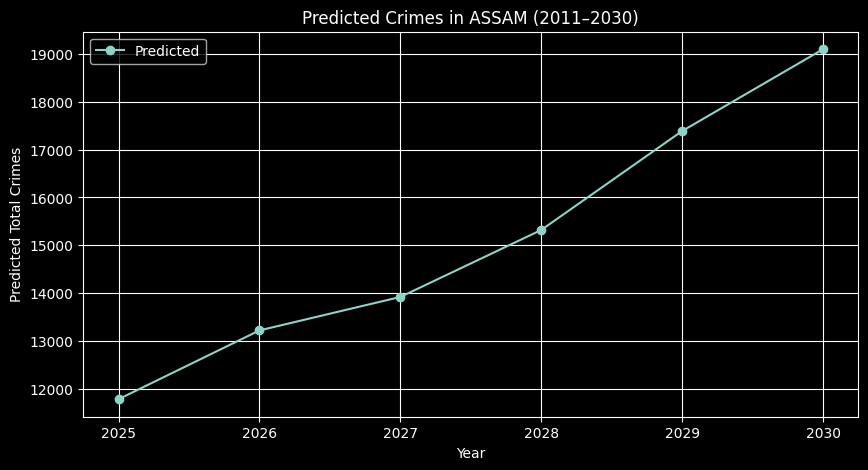

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(future_predictions['Year'], future_predictions['Predicted Total Crimes'], marker='o', label='Predicted')
plt.title("Predicted Crimes in ASSAM (2011–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Total Crimes")
plt.grid(True)
plt.legend()
plt.show()


In [114]:
def predict_future_crimes_with_types(state_name, data, model, scaler, label_encoder, start_year=2012, end_year=2030):
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'DV']

    # Get columns the scaler was trained on
    try:
        feature_cols = scaler.feature_names_in_.tolist()
    except AttributeError:
        raise ValueError("Scaler is missing 'feature_names_in_' — was it fitted on a DataFrame with column names?")

    # Encode state
    state_encoded = label_encoder.transform([state_name])[0]
    state_data = data[data['State_encoded'] == state_encoded].copy()

    # Compute trends
    trends = {
        col: state_data[col].diff().rolling(5).mean().iloc[-1]
        for col in crime_cols
    }

    last_row = state_data.iloc[-1]
    future_data = []

    for year in range(start_year, end_year + 1):
        new_row = {
            'Unnamed: 0': last_row['Unnamed: 0'] + (year - last_row['Year']),
            'Year': year,
            'State_encoded': state_encoded
        }

        for col in crime_cols:
            last_value = future_data[-1][col] if future_data else last_row[col]
            new_row[col] = max(0, last_value + trends[col])

        future_data.append(new_row)

    future_df = pd.DataFrame(future_data)

    # 🧠 Align future data with scaler's expected feature columns
    try:
        X_future = future_df[feature_cols]
    except KeyError as e:
        print("Mismatch in features. Available in future_df:", future_df.columns.tolist())
        print("Expected by scaler:", feature_cols)
        raise e

    X_scaled = scaler.transform(X_future)
    predictions = model.predict(X_scaled)
    future_df['Predicted Total Crimes'] = predictions

    return future_df[['Year'] + crime_cols + ['Predicted Total Crimes']]


    Year    Rape      K&A      DD     AoW       DV  Predicted Total Crimes
0   2012  1632.2   6110.4  2347.6  2984.6   8672.6             9246.118079
1   2013  1701.4   6752.8  2478.2  3176.2   9367.2             9570.938036
2   2014  1770.6   7395.2  2608.8  3367.8  10061.8             9895.757993
3   2015  1839.8   8037.6  2739.4  3559.4  10756.4            10220.577949
4   2016  1909.0   8680.0  2870.0  3751.0  11451.0            10545.397906
5   2017  1978.2   9322.4  3000.6  3942.6  12145.6            10870.217862
6   2018  2047.4   9964.8  3131.2  4134.2  12840.2            11195.037819
7   2019  2116.6  10607.2  3261.8  4325.8  13534.8            11519.857775
8   2020  2185.8  11249.6  3392.4  4517.4  14229.4            11844.677732
9   2021  2255.0  11892.0  3523.0  4709.0  14924.0            12169.497689
10  2022  2324.2  12534.4  3653.6  4900.6  15618.6            12494.317645
11  2023  2393.4  13176.8  3784.2  5092.2  16313.2            12819.137602
12  2024  2462.6  13819.2

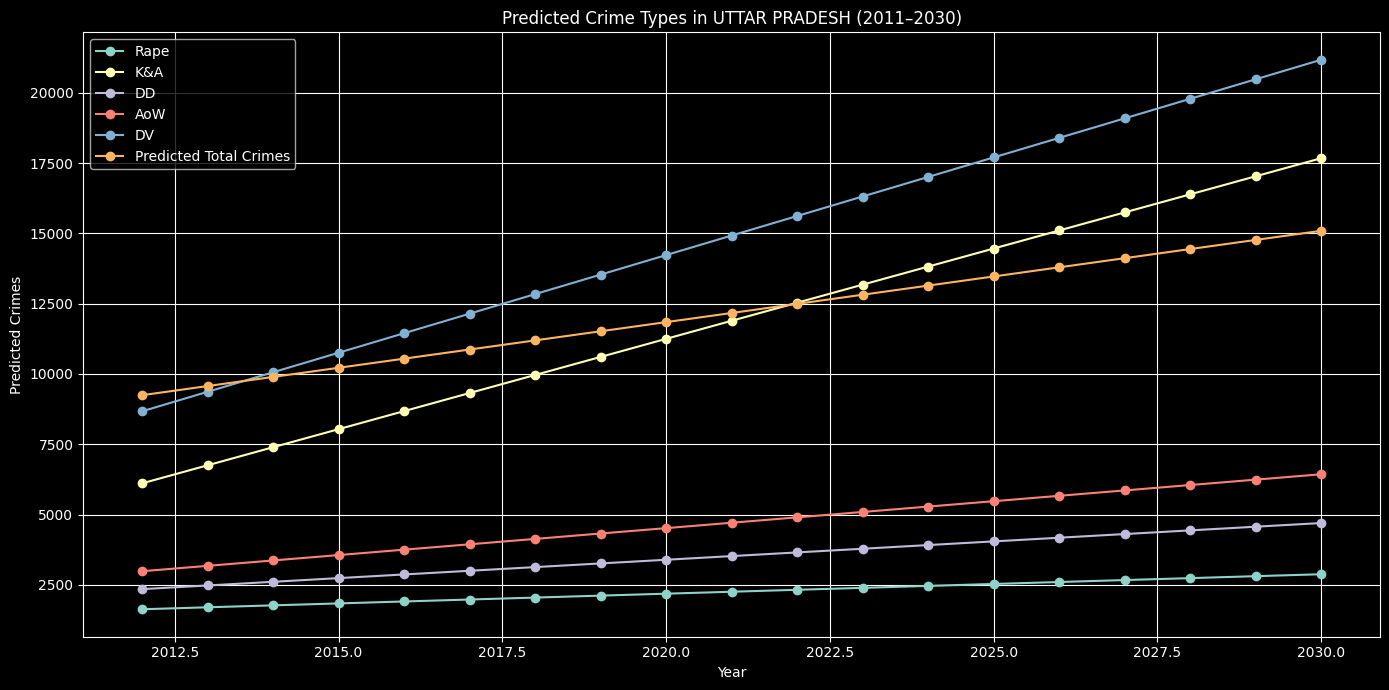

In [115]:
# Predict future data for UTTAR PRADESH
future_data = predict_future_crimes_with_types("UTTAR PRADESH", data, model, scaler, le)
print(future_data)

# # ✅ Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot all crime types + predicted total
for col in ['Rape', 'K&A', 'DD', 'AoW', 'DV', 'Predicted Total Crimes']:
    plt.plot(future_data['Year'], future_data[col], marker='o', label=col)

plt.title("Predicted Crime Types in UTTAR PRADESH (2011–2030)")
plt.xlabel("Year")
plt.ylabel("Predicted Crimes")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [112]:
def predict_future_crimes_for_year(state_name, target_year, data, model, scaler, label_encoder, start_year=2011, end_year=2030):
    # Define the crime columns to predict (excluding 'WT' and 'AoM')
    crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'DV']

    # Get columns scaler was trained on
    try:
        feature_cols = scaler.feature_names_in_.tolist()
    except AttributeError:
        raise ValueError("Scaler is missing 'feature_names_in_' — was it fitted on a DataFrame with column names?")

    # Encode state
    state_encoded = label_encoder.transform([state_name])[0]
    state_data = data[data['State_encoded'] == state_encoded].copy()

    # Calculate trends for each crime type
    trends = {
        col: state_data[col].diff().rolling(5).mean().iloc[-1]
        for col in crime_cols
    }

    last_row = state_data.iloc[-1]
    future_data = []

    # Loop through the years and predict the crimes
    for year in range(start_year, end_year + 1):
        new_row = {
            'Unnamed: 0': last_row['Unnamed: 0'] + (year - last_row['Year']),
            'Year': year,
            'State_encoded': state_encoded
        }

        for col in crime_cols:
            last_value = future_data[-1][col] if future_data else last_row[col]
            new_row[col] = max(0, last_value + trends[col])

        future_data.append(new_row)

    # Convert to DataFrame
    future_df = pd.DataFrame(future_data)

    # Align the data with scaler input
    try:
        X_future = future_df[feature_cols]
    except KeyError as e:
        print("Mismatch in features.")
        print("Available in future_df:", future_df.columns.tolist())
        print("Expected by scaler:", feature_cols)
        raise e

    # Scale the features
    X_scaled = scaler.transform(X_future)

    # Predict total crimes
    predictions = model.predict(X_scaled)

    # Append the predictions to the future data
    future_df['Predicted Total Crimes'] = predictions

    # Return the prediction for the specific target year
    prediction_for_target_year = future_df[future_df['Year'] == target_year]
    
    return prediction_for_target_year[['Year'] + crime_cols + ['Predicted Total Crimes']]


In [113]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['State_encoded'] = label_encoder.fit_transform(data['State'])

state_name = "Nagaland"  # Replace with any state in your dataset
target_year = 2025

# Call the function
result = predict_future_crimes_for_year(state_name, target_year, data, model, scaler, label_encoder)

# Display the result
result


,Year,Rape,K&A,DD,AoW,DV,Predicted Total Crimes
14,2025,5746.0,20550.0,1169.0,59370.0,19547.0,12188.30226


In [ ]:

import pickle

# Step 2: Create a new column for total crimes
from sklearn.linear_model import LinearRegression


le = LabelEncoder()
data['State_encoded'] = le.fit_transform(data['State'])
crime_cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
data['Total Crimes'] = data[crime_cols].sum(axis=1)



# Step 4: Select features and target
X = data[['State_encoded', 'Year']]  # Only these 2 for input
y = data['Total Crimes']


# Step 5: Scale inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train model
model = LinearRegression()
model.fit(X_scaled, y)

# Step 7: Save model and tools
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Model, Scaler, and LabelEncoder saved!")


state_input = "Arunachal Pradesh"
year_input = 2025


# Encode + scale input
encoded_state = le.transform([state_input])[0]
X_input = np.array([[encoded_state, year_input]])
X_scaled = scaler.transform(X_input)

# Predict
prediction = model.predict(X_scaled)[0]
print(f"🔍 Predicted Total Crimes for {state_input} in {year_input}: {int(prediction)}")


✅ Model, Scaler, and LabelEncoder saved!
🔍 Predicted Total Crimes for Arunachal Pradesh in 2025: 8827


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [107]:
def get_state_crime_details(state_name, data, model, scaler, label_encoder):
    """
    Shows crime data from 2001 to 2025 for a given state.
    Includes both actual (2001-2024) and predicted (2025) data.
    """
    import pandas as pd

    # Filter the actual data for the state
    state_data = data[data["State"] == state_name].copy()

    # Get last year in actual data
    last_year = state_data["Year"].max()
    next_year = last_year + 1

    # Get mean of latest year's features (or use other logic)
    input_features = state_data[state_data["Year"] == last_year][["Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT"]].mean()
    
    # Encode state and year
    state_encoded = label_encoder.transform([state_name])[0]

    # Build full input with Year and State_encoded
    input_full = pd.DataFrame([{
        "Year": next_year,
        "Rape": input_features["Rape"],
        "K&A": input_features["K&A"],
        "DD": input_features["DD"],
        "AoW": input_features["AoW"],
        "AoM": input_features["AoM"],
        "DV": input_features["DV"],
        "WT": input_features["WT"],
        "State_encoded": state_encoded
    }])

    # Scale the full input
    input_scaled = scaler.transform(input_full)

    # Predict
    predicted_total = model.predict(input_scaled)[0]

    # Create predicted row
    predicted_row = pd.DataFrame({
        "Year": [next_year],
        "State": [state_name],
        "Predicted Total Crimes": [round(predicted_total)]
    })

    # Actual data (till 2024)
    state_data = state_data[["Year", "State", "Rape", "K&A", "DD", "AoW", "AoM", "DV", "WT", "Total Crimes"]]

    # Combine
    result_df = pd.concat([state_data, predicted_row], ignore_index=True)

    return result_df


In [ ]:
label_encoder = LabelEncoder()
data['State_encoded'] = label_encoder.fit_transform(data['State'])
reposne = get_state_crime_details("Arunachal Pradesh", data, model, scaler, label_encoder)
reposne

In [116]:
import pickle

# Save your trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)